<a href="https://colab.research.google.com/github/Johandielangman/floyd-Steinberg/blob/main/Floyd_Steinberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [34]:
def readimage(path):
  """
  Read in the image using cv2:
  Input: path to image
  Output: Image Array, pixel width, pixel height
  """
  img = cv.imread(path) 
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  height, width,_ = img.shape
  return img, width, height

In [35]:
def find_closest_palette_color(oldpixel):
  """
  Rounding function
  Input: Oldpixel array
  Output: Newpixel (rounded) array between 0 and 255
  """
  return ((oldpixel /255).round())*255


Pseudo Code For Floyd-Steinberg Dithering
```
for each y from top to bottom do
    for each x from left to right do
        oldpixel := pixels[x][y]
        newpixel := find_closest_palette_color(oldpixel)
        pixels[x][y] := newpixel
        quant_error := oldpixel - newpixel
        pixels[x + 1][y    ] := pixels[x + 1][y    ] + quant_error × 7 / 16
        pixels[x - 1][y + 1] := pixels[x - 1][y + 1] + quant_error × 3 / 16
        pixels[x    ][y + 1] := pixels[x    ][y + 1] + quant_error × 5 / 16
        pixels[x + 1][y + 1] := pixels[x + 1][y + 1] + quant_error × 1 / 16
```



In [36]:
def floyd_steinberg(path):
  """
  Dither function
  Input: path to image to be dithered
  Output: Dithered array
  """
  # Load image and calc width and height
  pixels, width, height = readimage(path) 

  # Define the error diffusion weights
  w = [7/16, 3/16, 5/16, 1/16]

  # Loop through the pixels
  for y in range(0,height-1):
      for x in range(0,width-1):
        # Get the old and new pixels
        oldpixel = pixels[x,y]
        newpixel = find_closest_palette_color(oldpixel)

        # Calculate the quantisation error
        quant_error = oldpixel - newpixel

        # Push the error
        pixels[x][y]      = newpixel
        pixels[x+1][y]    = pixels[x+1][y]   + quant_error*w[0]
        pixels[x-1][y+1]  = pixels[x-1][y+1] + quant_error*w[1]
        pixels[x][y+1]    = pixels[x][y+1]   + quant_error*w[2]
        pixels[x+1][y+1]  = pixels[x+1][y+1] + quant_error*w[3]
  return pixels


# Test Functions

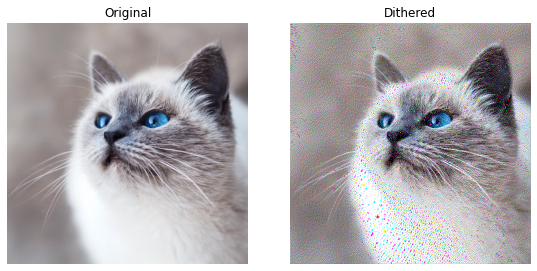

True

In [48]:
image_path = '/content/kitten.jpg'
dithered_image = floyd_steinberg(image_path)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].set_axis_off()

ax[1].imshow(dithered_image)
ax[1].set_title("Dithered")
ax[1].set_axis_off()

plt.savefig('comparison.png', bbox_inches='tight', dpi=500)
plt.show()
cv.imwrite("/content/dithered_image.jpg", cv.cvtColor(dithered_image, cv.COLOR_RGB2BGR))